## Intro to Data Structures: Column selection, addition, deletion
Pandas User Guide

https://pandas.pydata.org/docs/user_guide/dsintro.html

In [112]:
import numpy as np
import pandas as pd

In [113]:
d = {
   ....:     "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
   ....:     "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
   ....: }

In [114]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [115]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [116]:
df["three"] = df["one"] * df["two"]

In [117]:
df["flag"] = df["one"] > 2

In [118]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [119]:
del df["two"]

In [120]:
three = df.pop("three")

In [121]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [122]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [123]:
three.dtypes

dtype('float64')

In [124]:
df["foo"] = "bar"
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [125]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The insert function is available to insert at a particular location in the columns:

In [126]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


Assigning new columns in method chains

Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns.

In [127]:
var_names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
iris = pd.read_csv("iris.data", header=None, names=var_names)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [129]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


assign always returns a copy of the data, leaving the original DataFrame untouched.

In [130]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='SepalRatio', ylabel='PetalRatio'>

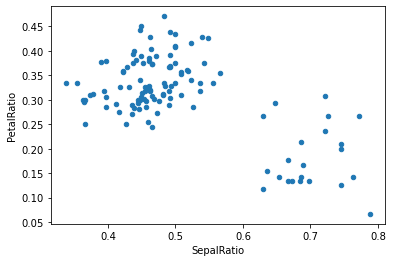

In [131]:
(
   ....:     iris.query("SepalLength > 5")
   ....:     .assign(
   ....:         SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
   ....:         PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
   ....:     )
   ....:     .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
   ....: )

In [132]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [133]:
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12
